In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

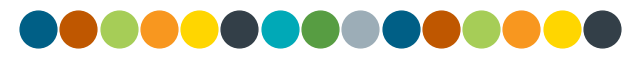

In [25]:
# https://brand.utexas.edu/identity/color/
import random
from cycler import cycler

random.Random(12).shuffle(colors := '#bf5700 #f8971f #ffd600 #a6cd57 #579d42 #00a9b7 #005f86 #9cadb7 #333f48'.split(' '))
plt.figure(figsize=(8,0.5))
for i in range(15): plt.scatter(i,0,s=700)
plt.axis('off')
plt.show()
plt.rc('axes', prop_cycle=cycler(color=colors))

In [26]:
def plot_util(title:str, xlabel:str, ylabel:str, outer_legend:bool, xlim0:bool, ylim0:bool):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if outer_legend: plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)
    else: plt.legend()
    plt.grid()
    if xlim0: plt.xlim(left=0)
    if ylim0: plt.ylim(bottom=0)

def my_save_fig(filename):
    IMAGE_DIRECTORY = r'./'
    plt.savefig(IMAGE_DIRECTORY+filename, bbox_inches='tight')

In [27]:
dat11 = pd.read_csv('../../VGG11/metrics.csv')
dat16 = pd.read_csv('../../VGG16/metrics.csv')

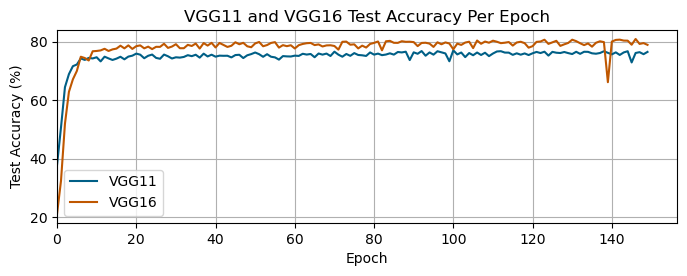

In [28]:
# P1 Q3

plt.figure(figsize=(8,2.5))

x = dat11['epoch']
y1 = dat11['test_acc']
y2 = dat16['test_acc']

plt.plot(x, y1, label='VGG11')
plt.plot(x, y2, label='VGG16')
plot_util('VGG11 and VGG16 Test Accuracy Per Epoch', 
          'Epoch', 'Test Accuracy (%)',
          False, True, False)
my_save_fig('vgg11_16_acc.pdf')

plt.show()

In [29]:
# P2 Q3

mc1_path = r'../../mc1 results/'
rpi_path = r'../../rpi_results/'
models = ['VGG11', 'VGG16', 'MobileNet']
df_mc1 = {m:pd.read_csv(mc1_path+m+'_power_temperature.csv') for m in models}
df_rpi = {m:pd.read_csv(rpi_path+m+'_power_temperature.csv') for m in models}

display(df_mc1['VGG11'].head())
display(df_rpi['VGG11'].head())

,Time stamp,Power,avg_temp
0,1.677120e+09,0.0,38.5
1,1.677120e+09,0.0,37.0
2,1.677120e+09,0.0,35.5
3,1.677120e+09,0.0,35.5
4,1.677120e+09,0.0,34.5


,Time stamp,Power,avg_temp
0,1.677121e+09,0.000,38.628
1,1.677121e+09,0.000,38.628
2,1.677121e+09,3.569,38.628
3,1.677121e+09,3.569,38.628
4,1.677121e+09,3.569,38.628


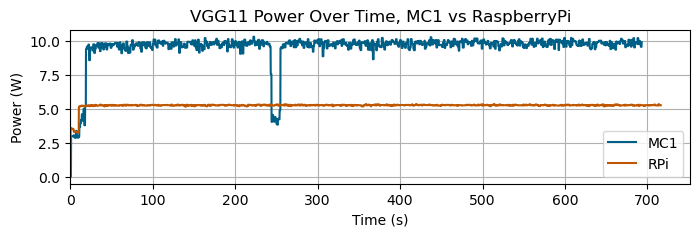

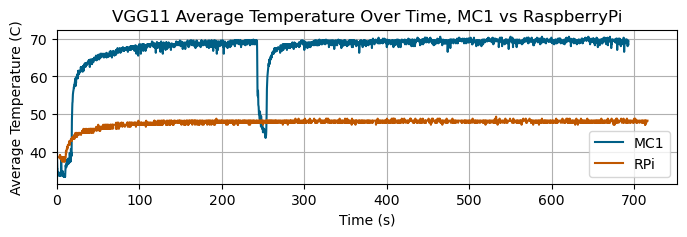

In [30]:
# P2 Q3

def plot_p2q3(col, col_title, units, model='VGG11'):
    plt.figure(figsize=(8,2))

    t_col = lambda df: (x:=df[model]['Time stamp'].to_numpy())-x[0]
    x_mc1 = t_col(df_mc1)
    x_rpi = t_col(df_rpi)
    y_mc1 = df_mc1[model][col].to_numpy()
    y_rpi = df_rpi[model][col].to_numpy()

    plt.plot(x_mc1, y_mc1, label='MC1')
    plt.plot(x_rpi, y_rpi, label='RPi')

    plot_util(f'VGG11 {col_title} Over Time, MC1 vs RaspberryPi',
            'Time (s)', f'{col_title} ({units})',
            False, True, False)
    my_save_fig(f'{model} {col_title}.pdf'.lower().replace(' ', '_'))

    plt.show()

plot_p2q3('Power', 'Power', 'W')
plot_p2q3('avg_temp', 'Average Temperature', 'C')